In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/campaign_responses.csv'
data = pd.read_csv(file_path)

print("Numeric Feature Summary:")
print(data.describe())
print("\nCategorical Feature Summary:")
for col in ['gender', 'employed', 'marital_status', 'responded']:
    print(f"{col} value counts:")
    print(data[col].value_counts())
    print()

Numeric Feature Summary:
       customer_id        age  annual_income  credit_score  no_of_children
count    56.000000  56.000000      56.000000     56.000000       56.000000
mean     28.500000  36.214286   69017.857143    719.107143        1.285714
std      16.309506   7.088311   22784.756524     60.340753        1.186504
min       1.000000  25.000000   35000.000000    600.000000        0.000000
25%      14.750000  30.000000   48000.000000    677.500000        0.000000
50%      28.500000  35.500000   64500.000000    720.000000        1.000000
75%      42.250000  42.000000   90000.000000    770.000000        2.000000
max      56.000000  51.000000  110000.000000    820.000000        3.000000

Categorical Feature Summary:
gender value counts:
gender
Male      28
Female    28
Name: count, dtype: int64

employed value counts:
employed
Yes    43
No     13
Name: count, dtype: int64

marital_status value counts:
marital_status
Married    28
Single     28
Name: count, dtype: int64

responded v

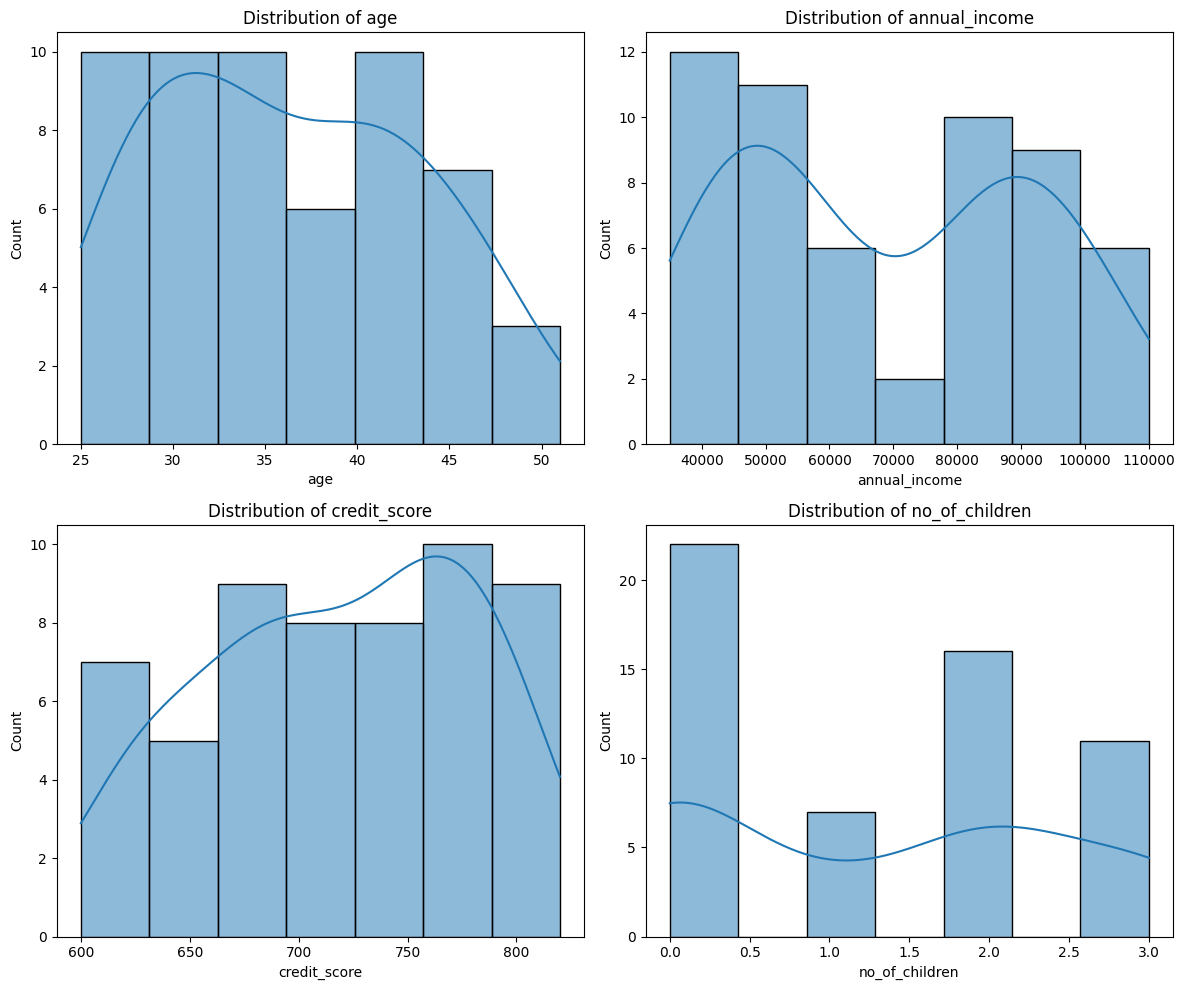

In [10]:
numeric_columns = ['age', 'annual_income', 'credit_score', 'no_of_children']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

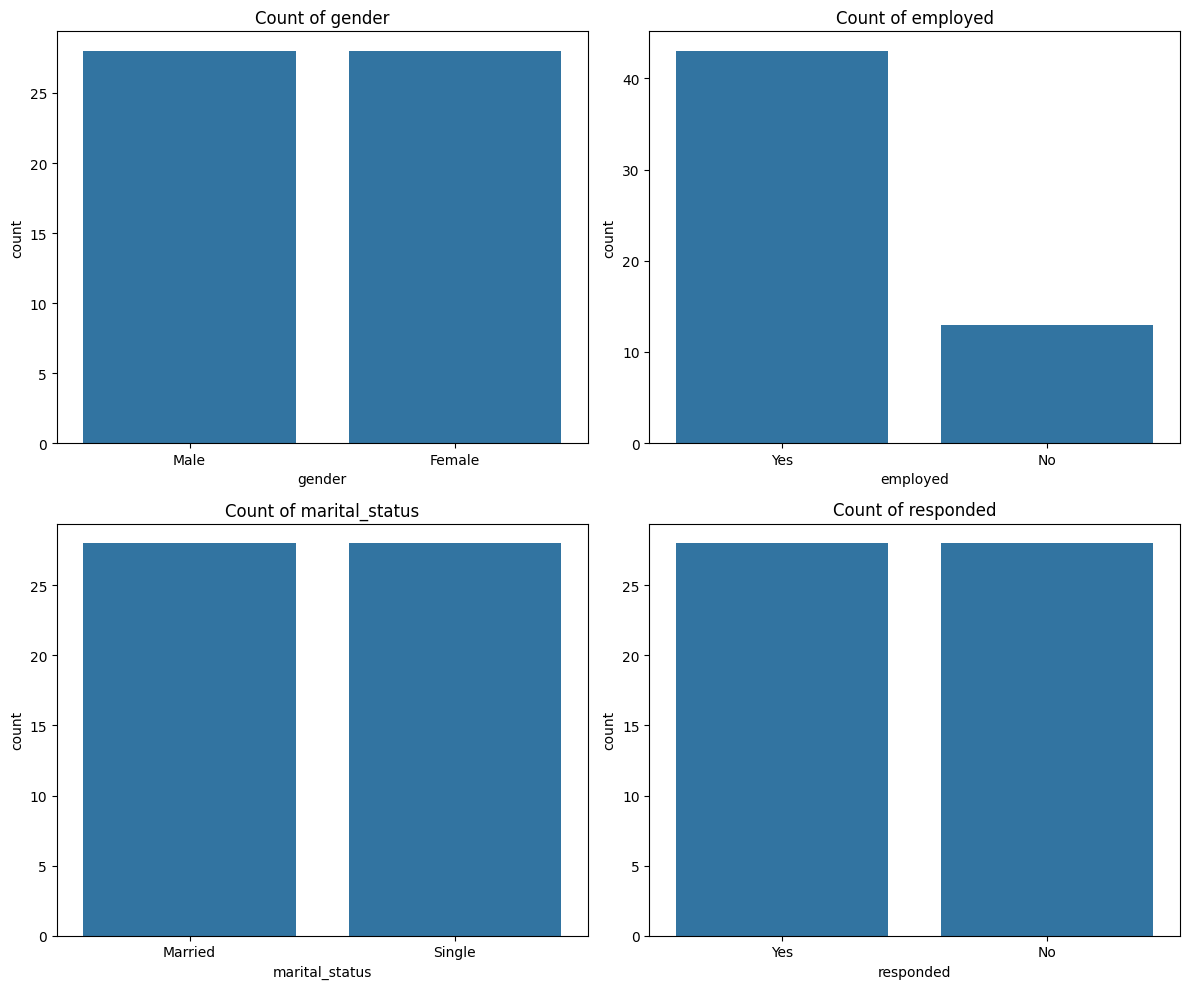

In [11]:
categorical_columns = ['gender', 'employed', 'marital_status', 'responded']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(categorical_columns):
    sns.countplot(x=data[col], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Count of {col}')
plt.tight_layout()
plt.show()

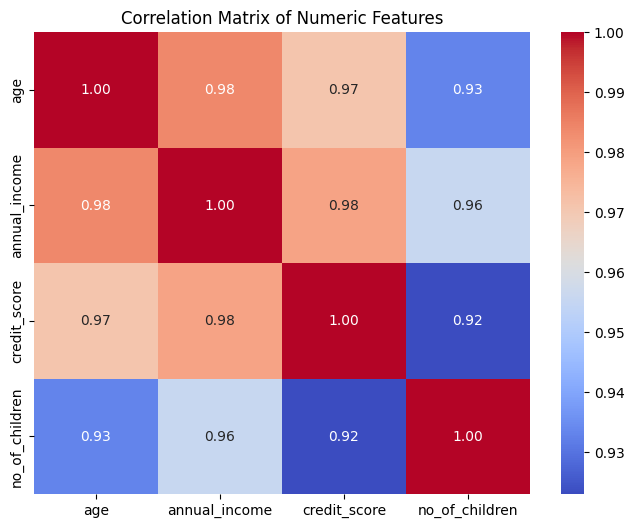

In [12]:
plt.figure(figsize=(8, 6))
numeric_corr = data[['age', 'annual_income', 'credit_score', 'no_of_children']].corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


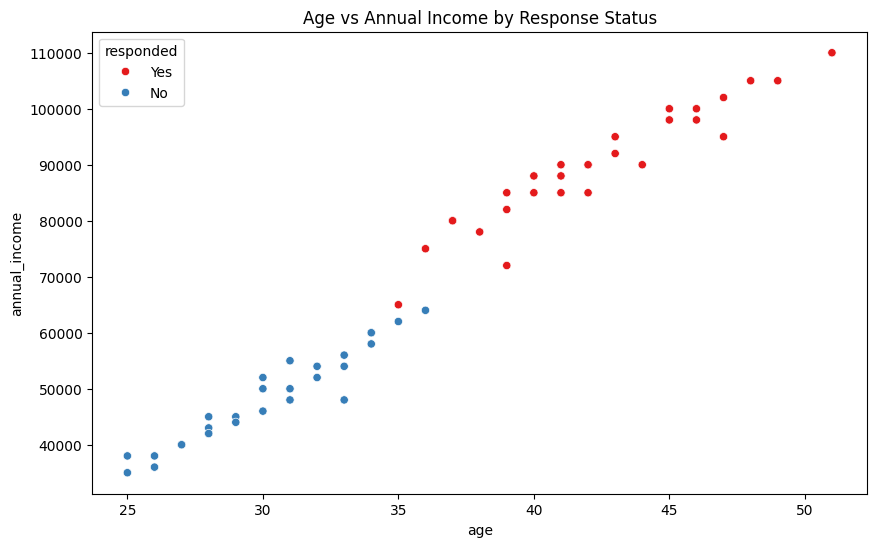

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='annual_income', hue='responded', data=data, palette="Set1")
plt.title("Age vs Annual Income by Response Status")
plt.show()

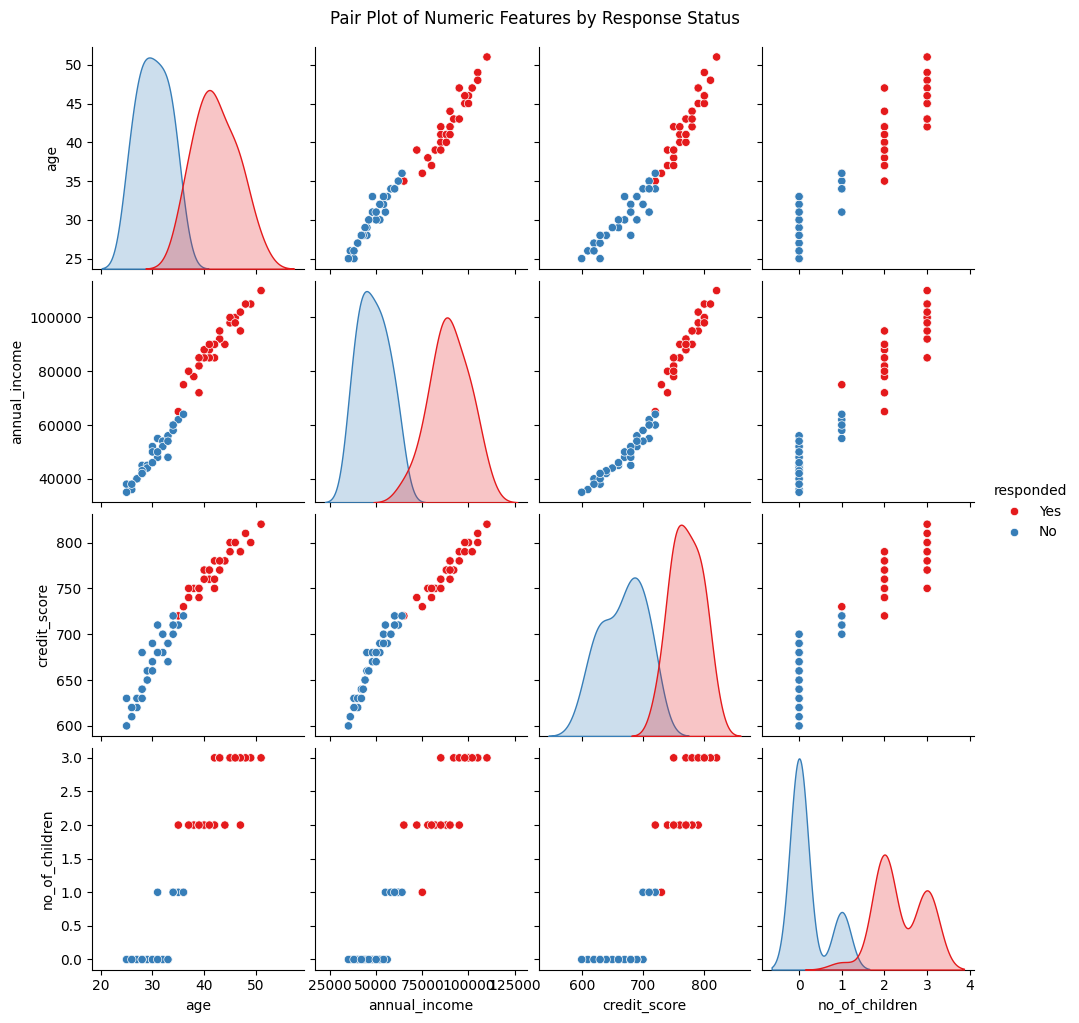

In [14]:
sns.pairplot(data, hue='responded', vars=['age', 'annual_income', 'credit_score', 'no_of_children'],
palette="Set1")
plt.suptitle("Pair Plot of Numeric Features by Response Status", y=1.02)
plt.show()

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC-ROC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



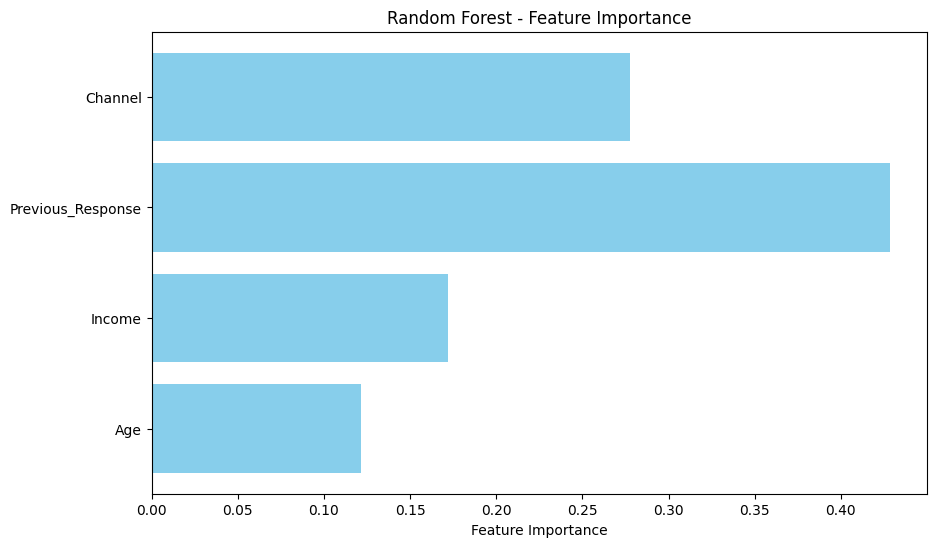

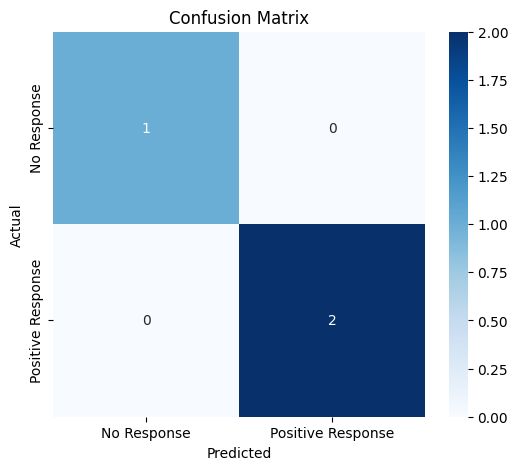

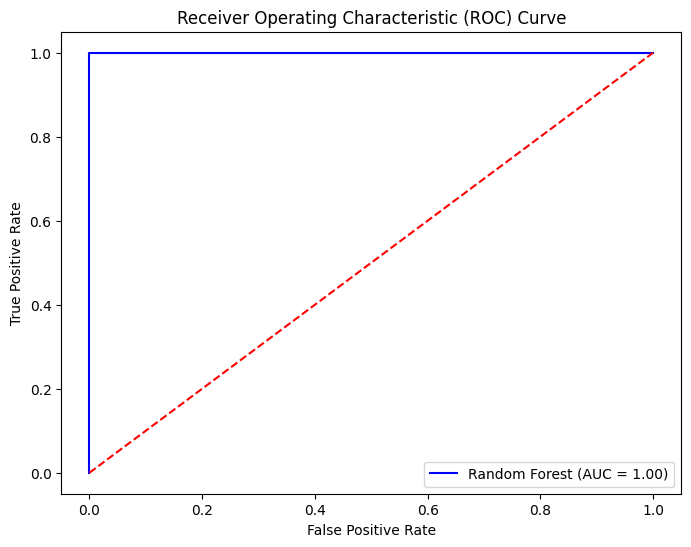

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
data = {
'Age': [25, 34, 45, 23, 36, 50, 32, 42, 27, 41],
'Income': [45000, 60000, 80000, 32000, 55000, 120000, 60000, 70000, 45000, 48000],
'Previous_Response': [1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
'Channel': ['Email', 'SMS', 'Email', 'Phone', 'Email', 'SMS', 'Phone', 'SMS', 'Email', 'Phone'],
'Response': [1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)
le = LabelEncoder()
df['Channel'] = le.fit_transform(df['Channel'])
X = df.drop('Response', axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
feature_importance = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Response', 'Positive Response'], yticklabels=['No Response', 'Positive Response'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()